# Otimizadores do Gradiente Descendente

## Objetivos

Os objetivos deste notebook são:

* introduzir os conceitos básicos iniciais de redes neurais através da 
* otimização de um ajuste de pontos por uma reta (linear) utilizando a 
* técnica de cálculo numérico do gradiente descendente. 

É introduzido também:

* o uso de matrizes tanto como 
    * notação matemática como 
    * forma de programação. 

Este notebook contém:
* primeiros programas matriciais de redes neurais, 
* laço de otimização e 
* plotagem de gráficos.
* Primeiro programa em Keras

# Importação dos módulos

In [225]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import keras
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Nadam

print(keras.__version__)


2.0.3


# Dados

In [226]:
W = np.array([[30,2]]) # bias e inclinação da reta
w_opt = W.reshape(2)
#x = np.array([28,73,94,53,40,2,13,20,81,99,24,58,69,36,15,76,66,90,92,57,11,1,55,70,23,20,84,56,31]).reshape(-1,1)
x = np.array([14.,86,28,51,28,29,72,62,84,15,42,62,47,35,9,38,44,99,13,21,28,20,8,64,99,70,27,17,8,80]).reshape(-1,1)
x -= x.min()
x /= x.max()
X_bias = np.hstack([np.ones_like(x),x])
y = X_bias.dot(W.T)
print('x.shape:',x.shape)
print('y.shape:',y.shape)
print('x:',x.T)
print('y:',y.T)

x.shape: (30, 1)
y.shape: (30, 1)
x: [[ 0.06593407  0.85714286  0.21978022  0.47252747  0.21978022  0.23076923
   0.7032967   0.59340659  0.83516484  0.07692308  0.37362637  0.59340659
   0.42857143  0.2967033   0.01098901  0.32967033  0.3956044   1.
   0.05494505  0.14285714  0.21978022  0.13186813  0.          0.61538462
   1.          0.68131868  0.20879121  0.0989011   0.          0.79120879]]
y: [[ 30.13186813  31.71428571  30.43956044  30.94505495  30.43956044
   30.46153846  31.40659341  31.18681319  31.67032967  30.15384615
   30.74725275  31.18681319  30.85714286  30.59340659  30.02197802
   30.65934066  30.79120879  32.          30.10989011  30.28571429
   30.43956044  30.26373626  30.          31.23076923  32.          31.36263736
   30.41758242  30.1978022   30.          31.58241758]]


## Visualização dos dados normalizados

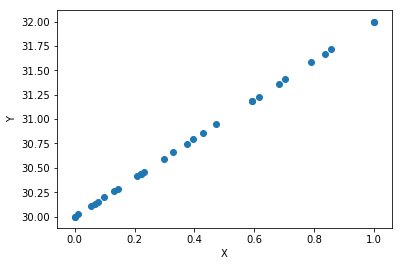

In [227]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim(0,100)
#plt.ylim(0,230)
plt.show()

In [245]:

batch_size = 30
nb_epoch = 10

opt1 = SGD(     lr=0.4)
opt2 = SGD(     lr=0.1, momentum=0.9, nesterov=False)
opt3 = SGD(     lr=0.1, momentum=0.9, nesterov=True)
opt4 = Adagrad( lr=30, epsilon=1e-08, decay=0.)
opt5 = Adadelta(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.)
opt6 = RMSprop( lr=10, rho=0.9, epsilon=1e-08, decay=0.0)
opt7 = Nadam(lr=10, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

opt1dic = {'name':'SGD1',     'lr':0.1,'opt':opt1}
opt2dic = {'name':'momentum', 'lr':0.1,'opt':opt2}
opt3dic = {'name':'nesterov', 'lr':0.1,'opt':opt3}
opt4dic = {'name':'Adagrad',  'lr':100,'opt':opt4}
opt5dic = {'name':'Adadelta', 'lr':100.,'opt':opt5}
opt6dic = {'name':'RMSprop',  'lr':0.1,'opt':opt6}
opt7dic = {'name':'Nadam',    'lr':0.1,'opt':opt7}

optlist = [(0,opt1dic),(1,opt2dic),(2,opt3dic),(3,opt4dic),(4,opt5dic),(5,opt6dic),(6,opt7dic)]
optlist = [(0,opt1dic)]
#historylist = [0,1,2,3,4,5]
for (i,opt) in optlist:
    print('i:',i)
    model = Sequential() 
    model.add(Dense(units=1, input_dim=1, activation='linear'))#,kernel_initializer="zero")) 
    model.compile(optimizer=opt['opt'], loss='mse') 
    try:
        historylist[i] =(model.fit(x, y, batch_size=batch_size, epochs=nb_epoch,verbose=0))
    except KeyboardInterrupt:
        pass


i: 0


final loss: 1.70433604717
final loss: 4.59742069244
final loss: 2.84585237503
final loss: 2.86568498611
final loss: 909.803527832
final loss: 1.65386199951


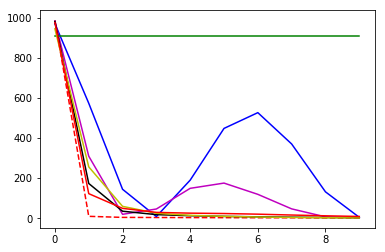

In [247]:
e = np.arange(nb_epoch)
plt.plot(e,historylist[0].history["loss"],'r--',
         e,historylist[1].history["loss"],'b',
         e,historylist[2].history["loss"],'m',
         e,historylist[3].history["loss"],'k',
         e,historylist[4].history["loss"],'g',
         e,historylist[5].history["loss"],'y',
         e,historylist[6].history["loss"],'r')
for i in range(6):
    print('final loss:',historylist[i].history["loss"][-1])

In [206]:
# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
iterations = 200
lr = 0.0001
lr = 0.0005

n_samples = y.shape[0]

w_init = np.array([[1.,1.]])

#w_history = batch_gradient_descent(X_bias, y, w_init, lr, iterations)
w_history = stochastic_gradient_descent_mini(X_bias, y, w_init, lr, iterations, 1)
#print(w_history[:30,:])

w_gd = w_history[::-1][0:1] # pega o último valor do gradiente descendente
print('w_gd:\n', w_gd)
print('final cost (gradiente descendente):', compute_cost(X_bias, y, w_gd.T))

J_history = compute_cost(X_bias, y, w_history.T)
print(J_history[:30])

w_gd:
 [[ 24.66009906  14.09527813]]
final cost (gradiente descendente): [ 13.83414796]
[ 862.94450945  862.602907    862.25068213  861.9072703   861.56056434
  861.21742803  860.87427977  860.52485132  860.17705857  859.8261172
  859.48560599  859.14121407  858.79397891  858.4491196   858.10618451
  857.76724759  857.42413921  857.08027591  856.72834841  856.38936583
  856.04933221  855.70839591  855.36878191  855.0310803   854.6852035
  854.33425056  853.98776233  853.64779707  853.30944763  852.97256344]


# Plot da curva de minimização de J com o número de iterações

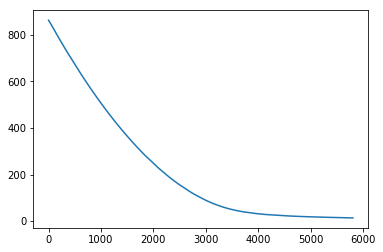

In [207]:
plt.plot(J_history) # mostrando log para amplificar valores baixos
#plt.ylim(0,1)
plt.show()

In [208]:
J_history_momentum = J_history.copy()

# Visualização do gradiente descendente no espaço de parâmetros - 2D

In [209]:
# Cálculo dos limites para gerar o espaço de parâmetros
def Jview_ex(X_bias, y, w_history, w_opt):
    wmin = w_history.min(axis=0)
    wmax = w_history.max(axis=0)
    D = wmax - wmin
    wmin -= D
    wmax += D
    #print('wmin:', wmin)
    #print('wmax:', wmax)

    # Cálculo da matriz bidimensional de parâmetros
    xx, yy = np.meshgrid(np.linspace(wmin[0], wmax[0],100), np.linspace(wmin[1], wmax[1],100))
    w_grid = np.c_[xx.ravel(), yy.ravel()]
    #print(xx.shape)
    #print(w_grid.shape)
    #print(X_bias.shape)

    # Cálculo do J(w) para todos os w da matriz de parâmetros

    J_grid = compute_cost(X_bias, y, w_grid.T)

    # Plotagem de J na matriz de parâmetros
    J_grid = J_grid.reshape(xx.shape)
    plt.pcolormesh(xx, yy, J_grid, cmap=plt.cm.cool) #Paired)
    plt.contour(xx,yy,J_grid,10)

    # Plotagem dos pontos da sequência dos parâmetros durante o processo do gradiente descendente

    plt.scatter(w_history[:,0],w_history[:,1])
    plt.scatter(w_opt[0],w_opt[1],marker='x', c='b') # Solução analítica
    plt.title('Visualização do treinamento de w na função de Custo J')
    plt.show()


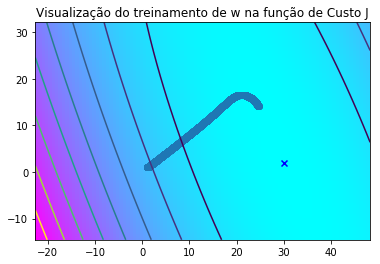

In [210]:
#from Jview import Jview

Jview_ex(X_bias, y, w_history, w_opt)

# Visualização do gradiente descendente no espaço de parâmetros - 3D

## Jview3D - Exercício

In [85]:
def Jview3D_ex(X_bias, y, w_history, w_opt):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import cm

    wmin = w_history.min(axis=0)
    wmax = w_history.max(axis=0)
    D = wmax - wmin
    wmin -= D
    wmax += D
    # Cálculo da matriz bidimensional de parâmetros
    xx, yy = np.meshgrid(np.linspace(wmin[0], wmax[0],100), np.linspace(wmin[1], wmax[1],100))
    w_grid = np.c_[xx.ravel(), yy.ravel()]

    # Cálculo do J(w) para todos os w da matriz de parâmetros

    J_grid = compute_cost(X_bias, y, w_grid.T)

    # Plotagem de J na matriz de parâmetros
    J_grid = J_grid.reshape(xx.shape)

    fig = plt.figure(figsize=(35,17.75))
    ax = fig.add_subplot(111, projection='3d')

    #plota a superfcie 3D
    ax.plot_surface(xx, yy, J_grid, alpha=0.5, cmap=cm.coolwarm)
    ax.contour(xx,yy,J_grid,15)
    #Plota o historicos do vetor W
    ax.scatter(w_history[:,0],w_history[:,1],J_history, c='r',marker = 'o',s = 80)
    ax.scatter(w_opt[0],w_opt[1],marker='x', c='b',s = 80)
    ax.set_xlabel(r'$w_0$',fontsize = 35)
    ax.set_ylabel(r'$w_1$',fontsize = 35)
    ax.set_zlabel('Custo (J)',fontsize = 35);


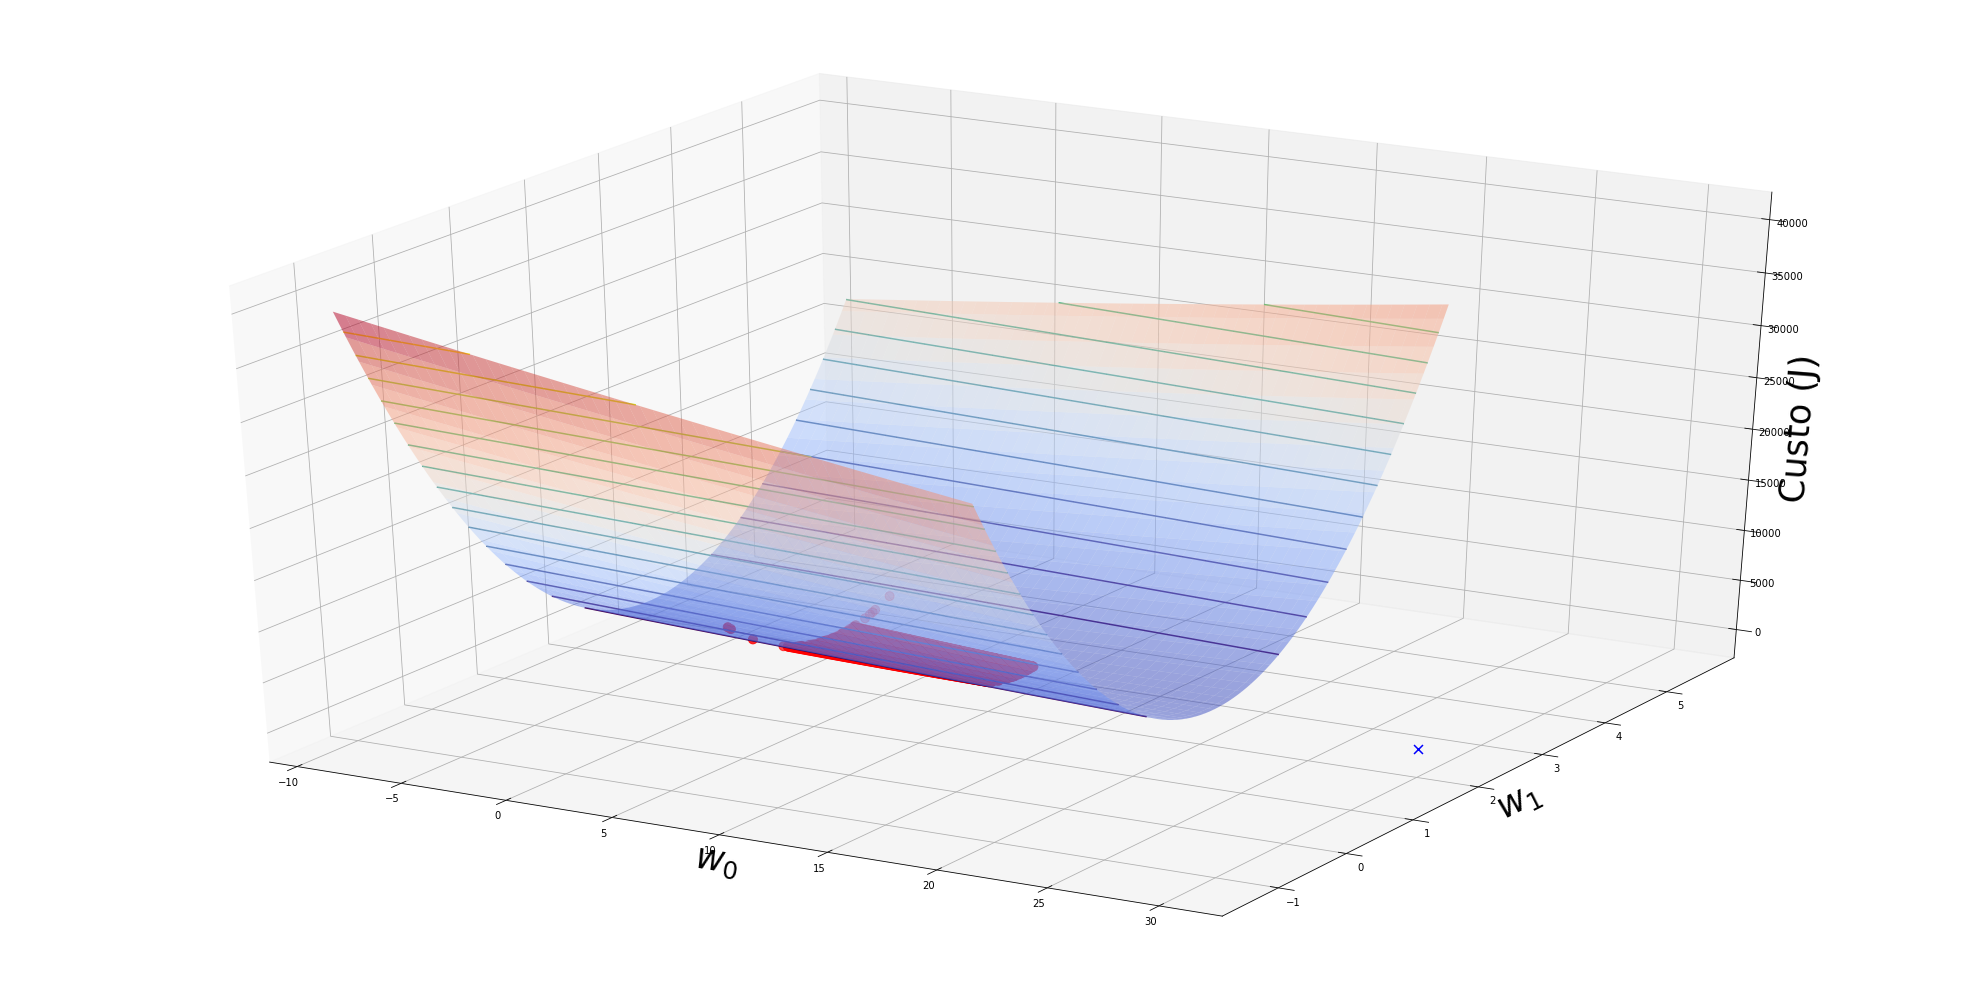

In [88]:
#from Jview import Jview3D
w_opt = np.array([30.,2.])
Jview3D_ex(X_bias, y, w_history, w_opt)
#Jview3DImpl(X_bias, y, w_history, w_opt)

# Conclusões desse experimento

Quais são as principais conclusões que podemos tirar deste experimento?

